## Mini-Project Title: Building a Text Classification Model for News Categorization

## Overview
This project focuses on using Natural Language Processing (NLP) techniques to build a text classification model for news categorization. With a large influx of news articles daily, manual categorization is inefficient. Automating this process using NLP ensures scalability, accuracy, and consistency.


## Objective
Develop an NLP-powered machine learning model that categorizes news articles into predefined categories such as Politics, Sports, Technology, Entertainment, and Health. This project covers the complete NLP pipeline, including preprocessing, feature extraction, model training, evaluation, and deployment.

## Learning Outcomes
1. Understand text preprocessing techniques like tokenization, stopword removal, and stemming/lemmatization.
2. Explore feature extraction methods such as Bag of Words, TF-IDF, and word embeddings.
3. Learn to use NLP libraries like NLTK, spaCy, and Hugging Face Transformers.
4. Experiment with NLP-specific models such as LSTM, BERT, or other transformer-based models.
5. Gain experience in deploying NLP models via APIs.


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Automation of news categorization using NLP can save time, improve accuracy, and enhance user experience by organizing content effectively.

### Mini-task:
Write a brief paragraph on how NLP benefits the media industry in automating news categorization.


## Step 2: Data Collection
### Task:
Collect a dataset of news articles suitable for text classification. Publicly available datasets such as the AG News dataset or datasets from Kaggle can be used.

### Mini-task:
Download and load a suitable dataset for NLP tasks.


In [1]:
 import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/new-dataset-for-text-classification-ag-news")

print("Path to dataset files:", path)

100%|██████████| 11.3M/11.3M [00:00<00:00, 199MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/new-dataset-for-text-classification-ag-news/versions/2


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the text structure, class distribution, and any potential imbalances.

### Mini-task:
Visualize the class distribution using a bar chart and inspect a few examples of text data.

Example

```python
import pandas as pd
import matplotlib.pyplot as plt

# Convert dataset to DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

# Inspect a sample
print(df.head())
```

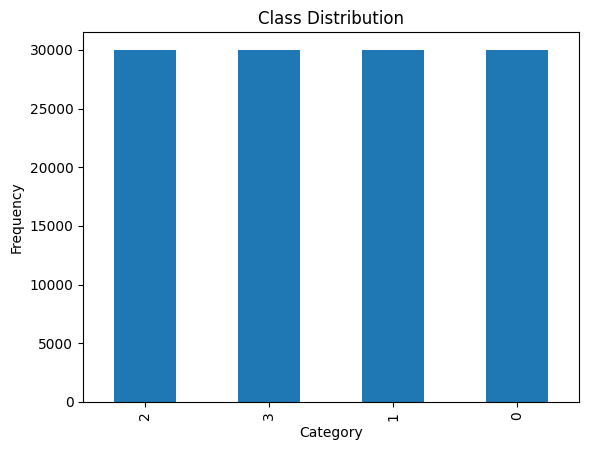

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load  Dataset and covert dataset to Dataframe for easier manipulation
df= pd.read_csv( '/root/.cache/kagglehub/datasets/thedevastator/new-dataset-for-text-classification-ag-news/versions/2/train.csv')
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

df.head()

## Step 4: Text Preprocessing
### Task:
Preprocess the text data using techniques such as:
- Lowercasing
- Tokenization
- Stopword removal
- Lemmatization (optional)

### Mini-task:
Clean a small sample of the dataset using NLP libraries like NLTK or spaCy.

Example

```python
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())
```


In [ ]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                        cleaned_text  
0  wall st bears claw black reuter reuter short s...  
1  carlyle look commercial aerospace reuter reute...  
2  oil economy cloud stock outlook reuters reuter...  
3  iraq halt oil export main southern pipeline re...  
4  oil price soar time record pose new menace eco...  


### Step 5: Feature Engineering
### Task:
Convert the preprocessed text into numerical representations using:
- Bag of Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Pre-trained word embeddings (e.g., GloVe or FastText)

### Mini-task:
Compare the feature matrices generated using TF-IDF and embeddings.

Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
# TF-IDF Representation is best suitablee for traditional ML models
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (120000, 5000)


## Step 6: Model Training Using NLP Models
### Task:
Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers.

### Mini-task:
Train a simple logistic regression model on the TF-IDF features.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 90.87%


### Optional: Fine-Tune a BERT Model
Train a transformer-based model using the Hugging Face `transformers` library for state-of-the-art results in text classification.

# Preparing the data

In [ ]:
# Importing kagglehub and getting the dataset path
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/new-dataset-for-text-classification-ag-news")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/new-dataset-for-text-classification-ag-news


In [ ]:
# Load  Dataset and covert dataset to Dataframe for easier manipulation
import pandas as pd
df= pd.read_csv('/kaggle/input/new-dataset-for-text-classification-ag-news/train.csv')

In [ ]:
#importing the necessary libraries
!pip install transformers
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 718.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch

# Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(df['text'], df['label'], random_state=40)

# Tokenize the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(x_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(x_test.tolist(), truncation=True, padding=True, max_length=512)

# Convert to PyTorch datasets
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(y_train.values))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                             torch.tensor(test_encodings['attention_mask']),
                             torch.tensor(y_test.values))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# Building the Transformer model

In [ ]:
import torch
from transformers import BertForSequenceClassification
from torch.optim import AdamW


# Load pre-trained BERT model with a classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Training the model

In [ ]:
from torch.utils.data import DataLoader
from tqdm import tqdm

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Training loop
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

for epoch in range(3):  # Train for 3 epochs
    model.train()
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

  0%|          | 4/5625 [04:13<91:34:00, 58.64s/it]

# Evaluating the model

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Test accuracy: {accuracy:.4f}")

NameError: name 'model' is not defined